In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
def loadNC(path):
    ds = xr.open_dataset(path)
    return ds.to_dataframe()

In [3]:
unod = loadNC('map_summarized.nc')
vnod = loadNC("map_summarized_vnod.nc")
mesh = xr.open_dataset("fesom.mesh.diag.nc")

In [4]:
unod.rename(columns={"speed": "u"},inplace=True)
vnod.rename(columns={"speed": "v"},inplace=True)


In [5]:
grid = pd.concat([mesh["lon"].to_dataframe(), mesh["lat"].to_dataframe()], axis=1)
df_grid = pd.concat([grid.reset_index(drop=True), unod.reset_index(drop=True),vnod.reset_index(drop=True)], axis=1, ignore_index=False)


New importing

In [16]:
from netCDF4 import Dataset, MFDataset
fl = Dataset('map_summarized.nc')
f2 = Dataset('map_summarized_vnod.nc')
f3 = Dataset('fesom.mesh.diag.nc')


In [22]:
fl.variables['speed']

<class 'netCDF4._netCDF4.Variable'>
float32 speed(unod)
    units: m_s
unlimited dimensions: 
current shape = (8852366,)
filling on, default _FillValue of 9.969209968386869e+36 used

### Velocity heat map

In [17]:
m = Basemap(projection='robin',lon_0=0, resolution='c')


In [18]:
x,y = m(f3.variables['lon'],f3.variables['lat'])


In [25]:
fl.variables['speed'][:]

masked_array(data=[-0.02075087, -0.04506094, -0.01073319, ...,
                   -0.07171508, -0.1426507 , -0.08932128],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

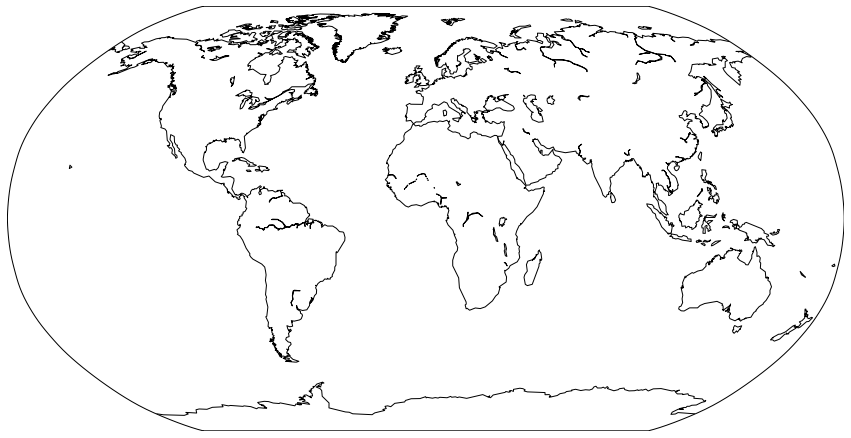

In [41]:
plt.figure(figsize=(15,15))
m.drawmapboundary(fill_color='1')
m.drawcoastlines()

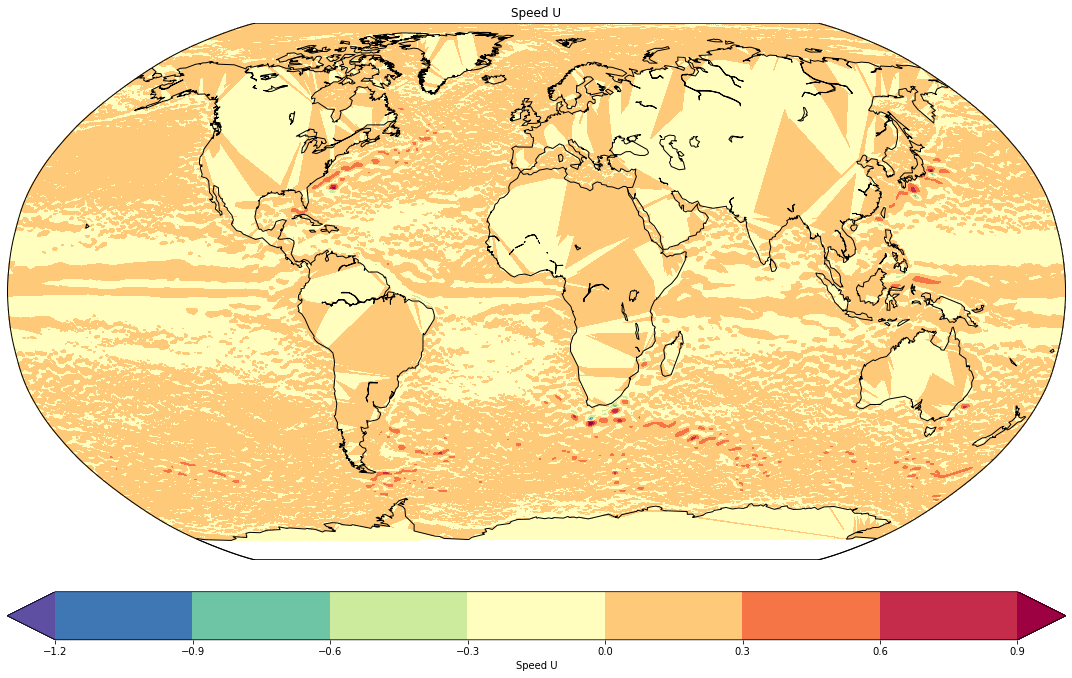

In [46]:
from matplotlib import cm

plt.figure(figsize=(15,15))

plt.tricontourf(x, y, fl.variables['speed'][:],cmap=cm.Spectral_r, extend='both')
m.drawcoastlines()
m.drawmapboundary(fill_color='1')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Speed U")
plt.title('Speed U')
plt.tight_layout()
plt.savefig('velocity_u.png', dpi=1000)


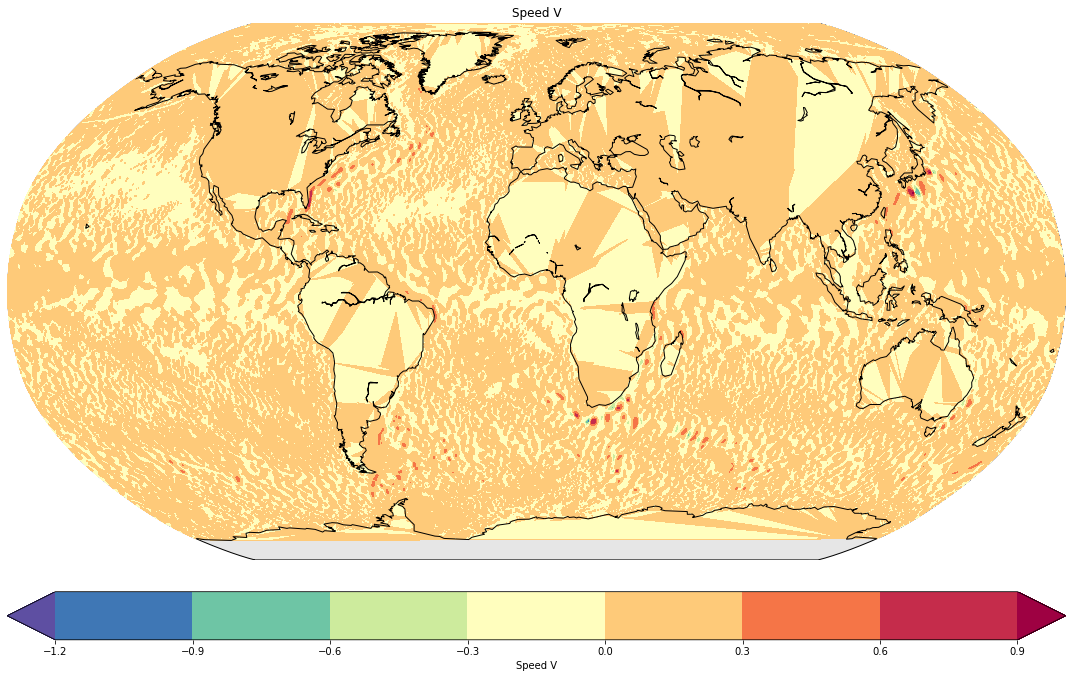

In [29]:
from matplotlib import cm

plt.figure(figsize=(15,15))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()

plt.tricontourf(x, y, f2.variables['speed'][:],cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Speed V")
plt.title('Speed V')
plt.tight_layout()
plt.savefig('velocity_v.png', dpi=1000)
